In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [9]:
import src.config as config
import src.config as config
from src.utils import get_project_root_path

In [11]:
ROOT = get_project_root_path()
print("Path:\t\t", ROOT)

Path:		 /Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction


In [18]:
df_data = pd.read_parquet(ROOT + '/data/processed/5.0_train.parquet.gzip')

In [19]:
df_data

,Sequence,Label,Split
0,M A P T L F Q K L F S K R T G L G A P G R D A ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
1,M D F T S L E T T T F E E V V I A L G S N V G ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
2,M D D I S G R Q T L P R I N R L L E H V G N P ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
3,M L G T V K M E G H E T S D W N S Y Y A D T Q ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test
4,M L G A V K M E G H E P S D W S S Y Y A E P E ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test
...,...,...,...
20753,M Q T Q V L F E H P L N E K M R T W L R I E F ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",test
20754,M Q S V T P T S Q Y L K A L N E G S H Q P D D ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
20755,M R I F V Y G S L R T K Q G N S H W M T N A L ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train
20756,M T M S L E V F E K L E A K V Q Q A I D T I T ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",train


In [20]:
config.label_encoding

{'I': 0, 'L': 1, 'M': 2, 'O': 3, 'S': 4, 'T': 5, '': -100}

In [25]:
df_data["Label"].at[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [28]:
df_data["Label"] = df_data["Label"].apply(lambda x: [config.label_decoding[x] for x in list(x)])

In [30]:
df_data["Sequence"] = df_data["Sequence"].apply(lambda x: x.split(" "))


In [53]:
df_data

,Sequence,Label,Split
0,"[M, A, P, T, L, F, Q, K, L, F, S, K, R, T, G, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",train
1,"[M, D, F, T, S, L, E, T, T, T, F, E, E, V, V, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",train
2,"[M, D, D, I, S, G, R, Q, T, L, P, R, I, N, R, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",train
3,"[M, L, G, T, V, K, M, E, G, H, E, T, S, D, W, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",test
4,"[M, L, G, A, V, K, M, E, G, H, E, P, S, D, W, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",test
...,...,...,...
20753,"[M, Q, T, Q, V, L, F, E, H, P, L, N, E, K, M, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",test
20754,"[M, Q, S, V, T, P, T, S, Q, Y, L, K, A, L, N, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",train
20755,"[M, R, I, F, V, Y, G, S, L, R, T, K, Q, G, N, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",train
20756,"[M, T, M, S, L, E, V, F, E, K, L, E, A, K, V, ...","[I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, ...",train


In [33]:
most_common = df_data["Sequence"].apply(lambda x: pd.Series(x).mode()[0]).tolist()

In [114]:
df_seq_list = df_data["Label"].apply(lambda x: x).to_list()

In [117]:
print(df_seq_list[15838])

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [137]:
print(df_seq_list[0])

['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']


In [120]:
transposed_df_seq_list = list(zip(*df_seq_list))

In [141]:
res = []
for x in range(20):
    res.append(pd.Series(transposed_df_seq_list[x]).mode()[0])
print(res)

['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I']


In [82]:
# for index, item in enumerate(result_sequence):
#     print(index, item) 

In [151]:
result_sequence = [x for x in df_data["Label"] if set(x) != {'I'}]
# print(result_sequence)

In [178]:
l = df_data["Label"][pd.Series([set(x) != {'I'} for x in df_data["Label"]])].to_list()

In [186]:
res = [[] for x in range(70)]
for seq in l:
    for ind, ann in enumerate(seq):
        res[ind].append(ann)

In [193]:
print(*[pd.Series(x).mode()[0] for x in res], sep="")

SSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


In [198]:
opt = [pd.Series(x).mode()[0] for x in res]
print(*opt, sep="")

SSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


In [251]:
res_c = [0 for x in range(70)]
for seq in l:
    for ind, ann in enumerate(seq):
        if ann == opt[ind]:
            res_c[ind] += 1

In [213]:
print(*res_c)

3372 3372 3372 3372 3372 3372 3372 3371 3371 3371 3371 3367 3366 3364 3355 3296 3127 3015 2811 2481 2235 2628 3076 3478 3805 4038 4302 4503 4673 4829 4962 5094 5219 5294 5358 5411 5454 5476 5501 5533 5559 5587 5618 5630 5658 5690 5713 5706 5706 5716 5727 5732 5737 5745 5744 5740 5748 5743 5749 5731 5722 5713 5716 5704 5696 5696 5698 5690 5679 5677


In [233]:
asdkl = [round(x/len(l), 2) for x in res_c]

print(*asdkl)
print(round(sum(asdkl)/len(asdkl), 2))


0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.49 0.46 0.45 0.42 0.37 0.33 0.39 0.46 0.52 0.57 0.6 0.64 0.67 0.69 0.72 0.74 0.76 0.78 0.79 0.8 0.8 0.81 0.81 0.82 0.82 0.83 0.83 0.84 0.84 0.84 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.85 0.84 0.84
0.69


In [335]:
df_prob = pd.DataFrame({
    'optimal_sequence': opt,
    'probability': asdkl,
    'total': res_c,
    'stdev': pd.Series(asdkl).std(),
    'variance': pd.Series(asdkl).var()
})
display(df_prob)

,optimal_sequence,probability,total,stdev,variance
0,S,0.50,3372,0.172212,0.029657
1,S,0.50,3372,0.172212,0.029657
2,S,0.50,3372,0.172212,0.029657
3,S,0.50,3372,0.172212,0.029657
4,S,0.50,3372,0.172212,0.029657
...,...,...,...,...,...
65,O,0.85,5696,0.172212,0.029657
66,O,0.85,5698,0.172212,0.029657
67,O,0.85,5690,0.172212,0.029657
68,O,0.84,5679,0.172212,0.029657


/var/folders/c3/ctxqsv450b3cgzj3sklngdm80000gn/T/ipykernel_67430/1631152728.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df_prob.optimal_sequence)


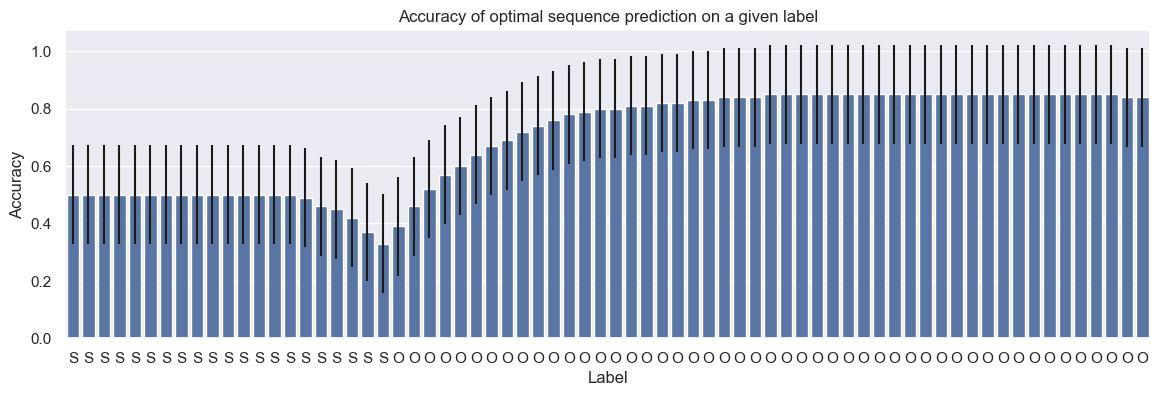

In [338]:
sns.set_theme()
plt.figure(figsize=(14,4))
g = sns.barplot(data=df_prob.probability, yerr=df_prob.stdev.at[0])
g.set_xticklabels(df_prob.optimal_sequence)
g.set_title("Accuracy of optimal sequence prediction on a given label")
g.set_xlabel("Label")
g.set_ylabel("Accuracy")

plt.show()
